In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/N-CMAPSS_DS02-006.csv')
df.head()

,unit,cycle,Fc,hs,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,...,W31,W32,W48,W50,SmFan,SmLPC,SmHPC,phi,Y,split
0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.498785,15.899271,215.844851,228.411666,16.648833,9.898130,25.376144,41.893990,74,dev
1,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.486552,15.891931,215.745634,228.307014,16.639222,9.904927,25.380549,41.884434,74,dev
2,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.519340,15.911604,216.019054,228.592279,16.649823,9.923503,25.318848,41.953848,74,dev
3,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.532044,15.919226,216.121238,228.702994,16.653812,9.905518,25.361981,41.914342,74,dev
4,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.518460,15.911076,216.008509,228.584788,16.649031,9.897465,25.363994,41.911503,74,dev


In [3]:
def constant_feature(df):
    constant_feature = []
    for col in df.columns:
            if col != 'split' and abs(df[col].std() < 0.02):      # hint
                constant_feature.append(col)

    return constant_feature

len_df_before_remove_constant_column = len(df)
df.drop(columns=constant_feature(df)  , inplace = True)
len_df_after_remove_constant_column = len(df)
remove_column_number = len_df_before_remove_constant_column - len_df_after_remove_constant_column

if(remove_column_number == 0):
  print('No column Removed!')
else:
  print(f"{remove_column_number} column removed!")

No column Removed!


In [ ]:
df_columns = list(df.columns)

In [ ]:
print(df_columns)

['unit', 'cycle', 'Fc', 'hs', 'alt', 'Mach', 'TRA', 'T2', 'T24', 'T30', 'T48', 'T50', 'P15', 'P2', 'P21', 'P24', 'Ps30', 'P40', 'P50', 'Nf', 'Nc', 'Wf', 'T40', 'P30', 'P45', 'W21', 'W22', 'W25', 'W31', 'W32', 'W48', 'W50', 'SmFan', 'SmLPC', 'SmHPC', 'phi', 'Y', 'split']


In [ ]:
df_corr = df[[x for x in df_columns if x != 'split']].corr()
mask = np.tril(np.ones(df_corr.shape),k = -1).astype(bool)
df_corr = df_corr.where(mask)
df_corr

,unit,cycle,Fc,hs,alt,Mach,TRA,T2,T24,T30,...,W25,W31,W32,W48,W50,SmFan,SmLPC,SmHPC,phi,Y
unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cycle,-0.131527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fc,-0.142951,0.008559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hs,0.047443,-0.713436,-0.102745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt,-0.027185,-0.001248,0.268826,-0.016103,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mach,-0.027675,-0.000458,0.235773,-0.021005,0.923007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRA,-0.014136,-0.002246,0.124812,-0.003032,0.501460,0.498434,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T2,0.025703,0.001384,-0.269775,0.012642,-0.981979,-0.834124,-0.477586,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T24,0.015769,0.009755,-0.202312,0.006226,-0.700584,-0.539962,0.238701,0.738779,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T30,0.013782,-0.011553,-0.097949,0.012918,-0.306058,-0.201791,0.663184,0.337761,0.882366,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'correlation'}>

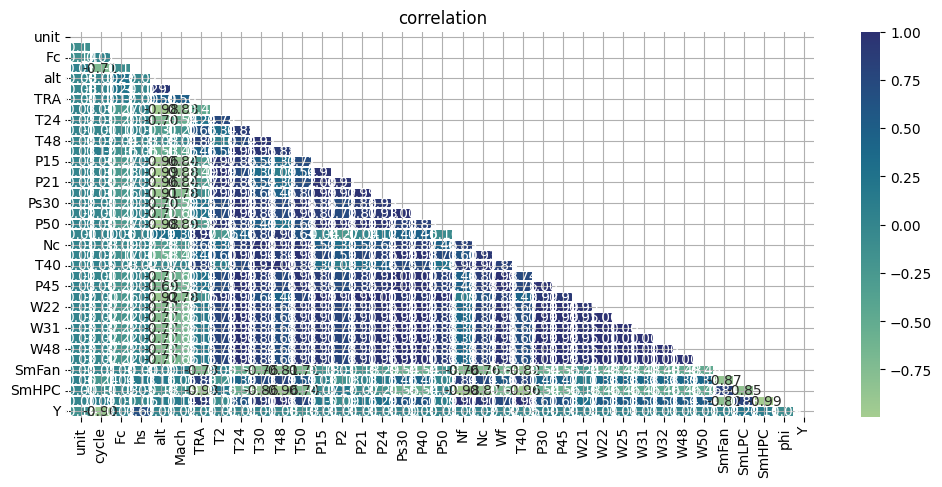

In [ ]:
plt.figure(figsize = (12,5))
plt.grid() , plt.title('correlation')
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , cmap='crest' , linewidths=0.01)

In [ ]:
# detect more than 95% correlation
high_corr = []
for col in df_corr.columns:
    for row in df_corr.index:
        if abs(df_corr.loc[col , row]) > 0.95 :
            high_corr.append((col , row))
high_corr

[('T2', 'alt'),
 ('T48', 'T30'),
 ('T50', 'T30'),
 ('P15', 'alt'),
 ('P15', 'T2'),
 ('P2', 'alt'),
 ('P2', 'T2'),
 ('P2', 'P15'),
 ('P21', 'alt'),
 ('P21', 'T2'),
 ('P21', 'P15'),
 ('P21', 'P2'),
 ('P24', 'P15'),
 ('P24', 'P21'),
 ('Ps30', 'T24'),
 ('Ps30', 'T50'),
 ('P40', 'T24'),
 ('P40', 'T50'),
 ('P40', 'Ps30'),
 ('P50', 'alt'),
 ('P50', 'T2'),
 ('P50', 'P15'),
 ('P50', 'P2'),
 ('P50', 'P21'),
 ('P50', 'P24'),
 ('Nf', 'TRA'),
 ('Nc', 'T30'),
 ('Nc', 'T48'),
 ('Wf', 'T24'),
 ('Wf', 'T50'),
 ('Wf', 'Ps30'),
 ('Wf', 'P40'),
 ('T40', 'T30'),
 ('T40', 'T48'),
 ('T40', 'Nc'),
 ('P30', 'T24'),
 ('P30', 'T50'),
 ('P30', 'Ps30'),
 ('P30', 'P40'),
 ('P30', 'Wf'),
 ('P45', 'T24'),
 ('P45', 'T50'),
 ('P45', 'Ps30'),
 ('P45', 'P40'),
 ('P45', 'Wf'),
 ('P45', 'P30'),
 ('W21', 'P15'),
 ('W21', 'P21'),
 ('W21', 'P24'),
 ('W21', 'P50'),
 ('W22', 'T24'),
 ('W22', 'P24'),
 ('W22', 'Ps30'),
 ('W22', 'P40'),
 ('W22', 'Wf'),
 ('W22', 'P30'),
 ('W22', 'P45'),
 ('W22', 'W21'),
 ('W25', 'T24'),
 ('W25', 'P

Remove Correlated Features

In [4]:
selected_columns = ['unit', 'cycle', 'Fc', 'hs','P21','Nc','Wf','SmFan','SmLPC', 'phi', 'Y','split']
df = df[selected_columns]

In [5]:
from sklearn.model_selection import train_test_split


features = selected_columns[2:-2]   # drop  engine , time , rul, split of  dataset

I wonder which approach is suitable for test, train data split, so I test 2 approach:
1- Split train and tset Data based On Split in Original Data
2- Split train and tset Data Randomly
you can see the result in continue.


First approach:
  Split train and tset Data based On Split in Original Data

In [5]:
X_train = df[df['split']=='dev'][features]
y_train = df[df['split']=='dev']['Y']

X_test = df[df['split']=='test'][features]
y_test = df[df['split']=='test']['Y']


In [ ]:
features

In [6]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)      # fit on only train dataset

X_test = scaler.transform(X_test)

In [7]:
from sklearn.metrics import root_mean_squared_error , r2_score

def metrics(y_true , y_pred , label = 'train'):
    '''evaluate model , by taking y_true , y_pred and label of dataset'''

    rmse = root_mean_squared_error(y_true , y_pred)
    r2 = r2_score(y_true , y_pred)
    print(f'for {label} set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

In [ ]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train , y_train)

y_pred = model_linreg.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_linreg.predict(X_test)
metrics(y_test , y_pred , label = 'test')

for train set , RMSE = 10.18 , r2_score = 79.29%
for test set , RMSE = 11.09 , r2_score = 65.82%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train , y_train)

y_pred = model_tree.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_tree.predict(X_test)
metrics(y_test , y_pred , label = 'test')

for train set , RMSE = 0.00 , r2_score = 100.00%
for test set , RMSE = 12.87 , r2_score = 53.94%


In [ ]:
from sklearn.svm import SVR
model_svm = SVR(kernel='rbf',
               gamma=0.1,
               C=5)
model_svm.fit(X_train , y_train)

y_pred = model_svm.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_svm.predict(X_test)
metrics(y_test , y_pred , label = 'test')


Second approach: Split train and tset Data Randomly in Original Data

In [6]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['Y']

X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size=0.2 , random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)      # fit on only train dataset

X_test = scaler.transform(X_test)

In [8]:
from sklearn.metrics import root_mean_squared_error , r2_score

def metrics(y_true , y_pred , label = 'train'):
    '''evaluate model , by taking y_true , y_pred and label of dataset'''

    rmse = root_mean_squared_error(y_true , y_pred)
    r2 = r2_score(y_true , y_pred)
    print(f'for {label} set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

In [9]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train , y_train)

y_pred = model_linreg.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_linreg.predict(X_test)
metrics(y_test , y_pred , label = 'test')

for train set , RMSE = 10.12 , r2_score = 78.62%
for test set , RMSE = 10.10 , r2_score = 78.68%


In [10]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train , y_train)

y_pred = model_tree.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_tree.predict(X_test)
metrics(y_test , y_pred , label = 'test')

for train set , RMSE = 0.00 , r2_score = 100.00%
for test set , RMSE = 4.69 , r2_score = 95.41%
